# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path  = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results  = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# ---- Question ---Why is it study_results first and 'how' is on the right??
merge_df = pd.merge(study_results, mouse_metadata,  on='Mouse ID', how='left')


# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [106]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_IDs = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

duplicate_mouse_IDs

array(['g989'], dtype=object)

In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_IDs) == False]

new_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [109]:
# Checking the number of mice in the clean DataFrame.
new_df['Mouse ID'].nunique()

248

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means        = new_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median       = new_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance     = new_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_dev = new_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_err = new_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std.Dev.": standard_dev,
    "Tumor Volume Std.Err": standard_err   
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df2 = merge_df.groupby('Drug Regimen')

summary = summary_df2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

summary

C:\Users\dyoon\AppData\Local\Temp\ipykernel_10384\226577180.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = summary_df2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

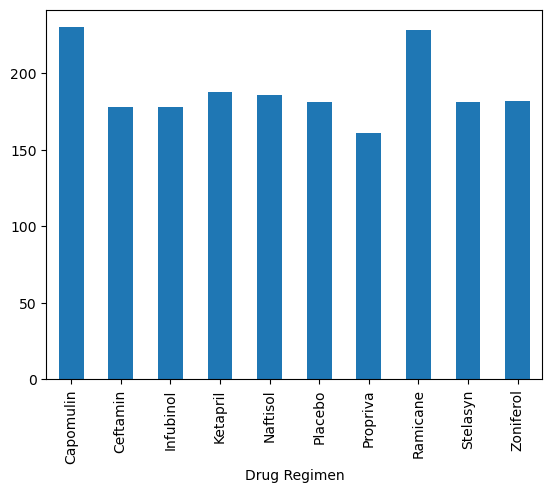

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_points = merge_df.groupby(["Drug Regimen"]).count()['Mouse ID']

data_points.plot(kind='bar')

plt.xlabel = ('Drug Regimen')
plt.ylabel = ('Number of Mice Tested')

plt.show()


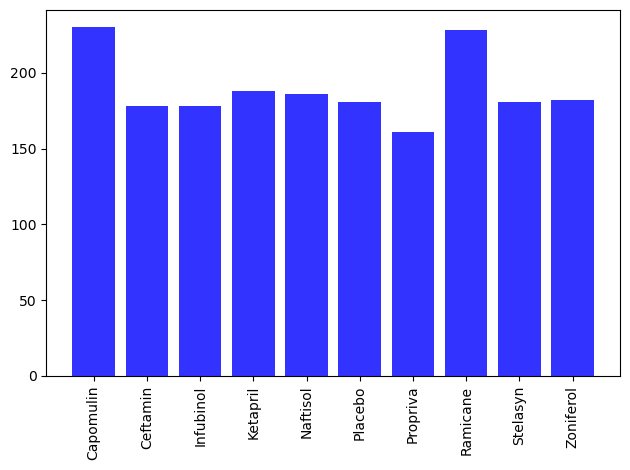

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(data_points))
mice = []

for mouse in data_points:
    mice.append(mouse)

plt.bar(x_axis, mice, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')


plt.xlabel = ('Drug Regimen')
plt.ylabel = ('Number of Mice Tested')

plt.tight_layout()
plt.show()

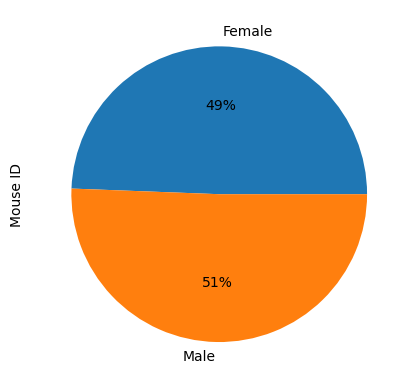

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = merge_df.groupby(["Sex"]).count()['Mouse ID']

gender_df.plot(kind='pie', y= 'Sex',autopct='%1.0f%%' )

plt.show()

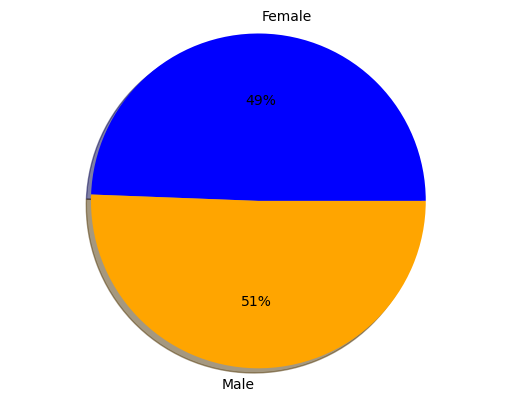

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', "Male"]
sizes = []

for size in gender_df:
    sizes.append(size)

colors = ['blue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True)

plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin",:]
ramicane_df  = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df  = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
caplast      = capomulin_df.groupby('Mouse ID').max()['Timepoint']
caplastvol   = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")

ramlast      = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol   = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")

inflast      = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inflastvol   = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")

ceftlast      = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol   = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")


In [156]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def get_outliers(merged_df):
    tumors = merged_df['Tumor Volume (mm3)']
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    return lower_bound, upper_bound

# Determine outliers using upper and lower bounds
print(get_outliers(caplastmerge))
print(get_outliers(ramlastmerge))
print(get_outliers(inflastmerge))
print(get_outliers(ceftlastmerge))   


(20.70456164999999, 51.83201549)
(17.912664470000003, 54.30681135)
(36.83290494999999, 82.74144559000001)
(25.355449580000002, 87.66645829999999)


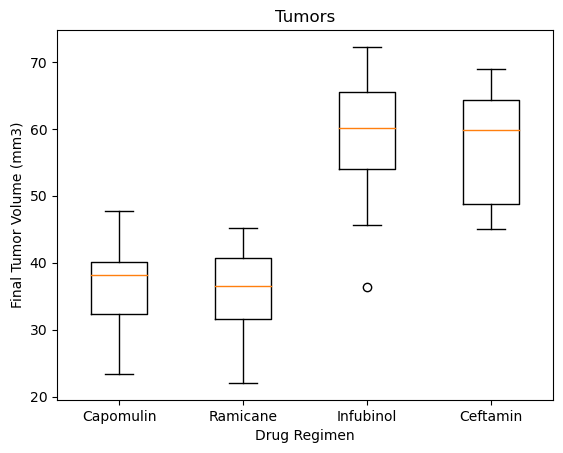

In [157]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plots = [
    caplastmerge ['Tumor Volume (mm3)'],
    ramlastmerge ['Tumor Volume (mm3)'],
    inflastmerge ['Tumor Volume (mm3)'],
    ceftlastmerge['Tumor Volume (mm3)']
]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_plots, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

TypeError: 'str' object is not callable

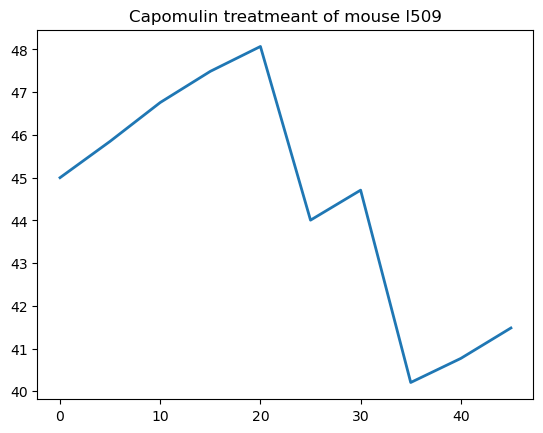

In [158]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=12)

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

TypeError: 'str' object is not callable

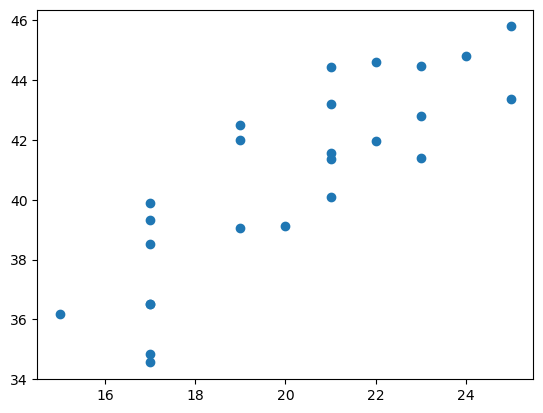

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [161]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation =round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is 0.84


TypeError: 'str' object is not callable

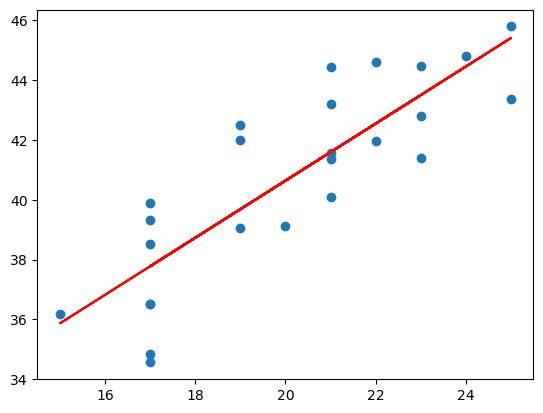

In [162]:
chart     = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
slope     = 0.9544396890241045
intercept = 21.552160532685015

y_values = cap_avg['Weight (g)'] * slope + intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()